In [554]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

In [555]:
data = pd.read_csv('../dataset/train.csv')
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [556]:
#

In [557]:
data['Transported'] = data['Transported'].astype(int)
data['CryoSleep'] = data['CryoSleep'].fillna(0).astype(int)
data['VIP'] = data['VIP'].fillna(0).astype(int)
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0
8689,9278_01,Earth,1,G/1499/S,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0


In [558]:
data['PassengerGroup'] = data['PassengerId'].str.split('_').str[0].astype(int)
data['more_than_one_in_group'] = data['PassengerGroup'].duplicated(keep=False).astype(int)
data = data.drop(columns='PassengerGroup')
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,more_than_one_in_group
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,0
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,1
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,1
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,0
8689,9278_01,Earth,1,G/1499/S,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,0
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,0
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,1


In [559]:
X = data.drop(columns='Transported')
y = data['Transported']

In [560]:
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,more_than_one_in_group
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,0
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,1
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,1
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,0
8689,9278_01,Earth,1,G/1499/S,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,0
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,0
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,1


In [561]:
data['LastName'] = data['Name'].str.split(' ').str[-1]
data['has_duplicate_lastname'] = data['LastName'].duplicated(keep=False).astype(int)
data = data.drop(columns='LastName')
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,more_than_one_in_group,has_duplicate_lastname
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,0,1
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,1,1
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,1,1
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,0,1
8689,9278_01,Earth,1,G/1499/S,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,0,1
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,0,1
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,1,1


In [562]:
data['RoomService'] = data['RoomService'].fillna(data['RoomService'].mean())
data['FoodCourt'] = data['FoodCourt'].fillna(data['FoodCourt'].mean())
data['ShoppingMall'] = data['ShoppingMall'].fillna(data['ShoppingMall'].mean())
data['Spa'] = data['Spa'].fillna(data['Spa'].mean())
data['VRDeck'] = data['VRDeck'].fillna(data['VRDeck'].mean())
data['Age'] = data['Age'].fillna(data['Age'].mean())

data['duplicated_name'] = data['Name'].duplicated(keep=False).astype(int)

In [563]:
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,more_than_one_in_group,has_duplicate_lastname,duplicated_name
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0,0,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,0,1,0
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,1,1,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,1,1,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,0,1,0
8689,9278_01,Earth,1,G/1499/S,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,0,1,0
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,0,1,0
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,1,1,0


In [564]:
new_set = data[['Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
                'Spa', 'VRDeck', 'CryoSleep', 'Transported', 'duplicated_name', 
                'has_duplicate_lastname', 'more_than_one_in_group', 'Cabin', 'HomePlanet']].copy()

new_set.loc[:, 'total_spent'] = (
    new_set['RoomService'] +
    new_set['FoodCourt'] +
    new_set['ShoppingMall'] +
    new_set['Spa'] +
    new_set['VRDeck']
)

new_set.loc[:, 'room_service_plus_food_court'] = (
    new_set['RoomService'] + new_set['FoodCourt']
)

new_set.loc[:, 'room_service_plus_shopping_mall'] = (
    new_set['RoomService'] + new_set['ShoppingMall']
)

new_set.loc[:, 'room_service_plus_spa'] = (
    new_set['RoomService'] + new_set['Spa']
)

new_set.loc[:, 'food_court_plus_shopping_mall'] = (
    new_set['FoodCourt'] + new_set['ShoppingMall']
)

new_set.loc[:, 'food_court_plus_spa'] = (
    new_set['FoodCourt'] + new_set['Spa']
)

new_set['planet_avg_spent'] = new_set.groupby('HomePlanet')['total_spent'].transform('mean')
new_set['planet_spent_ratio'] = new_set['total_spent'] / (new_set['planet_avg_spent'] + 1)

new_set

,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep,Transported,duplicated_name,...,Cabin,HomePlanet,total_spent,room_service_plus_food_court,room_service_plus_shopping_mall,room_service_plus_spa,food_court_plus_shopping_mall,food_court_plus_spa,planet_avg_spent,planet_spent_ratio
0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,B/0/P,Europa,0.0,0.0,0.0,0.0,0.0,0.0,3481.492644,0.000000
1,24.0,0,109.0,9.0,25.0,549.0,44.0,0,1,0,...,F/0/S,Earth,736.0,118.0,134.0,658.0,34.0,558.0,706.296089,1.040583
2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,0,...,A/0/S,Europa,10383.0,3619.0,43.0,6758.0,3576.0,10291.0,3481.492644,2.981485
3,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,0,...,A/0/S,Europa,5176.0,1283.0,371.0,3329.0,1654.0,4612.0,3481.492644,1.486292
4,16.0,0,303.0,70.0,151.0,565.0,2.0,0,1,0,...,F/1/S,Earth,1091.0,373.0,454.0,868.0,221.0,635.0,706.296089,1.542494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,0,0,...,A/98/P,Europa,8536.0,6819.0,0.0,1643.0,6819.0,8462.0,3481.492644,2.451118
8689,18.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,...,G/1499/S,Earth,0.0,0.0,0.0,0.0,0.0,0.0,706.296089,0.000000
8690,26.0,0,0.0,0.0,1872.0,1.0,0.0,0,1,0,...,G/1500/S,Earth,1873.0,0.0,1872.0,1.0,1872.0,1.0,706.296089,2.648113
8691,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,0,0,...,E/608/S,Europa,4637.0,1049.0,0.0,353.0,1049.0,1402.0,3481.492644,1.331518


In [565]:
new_set['total_spent'].isna().sum()

np.int64(0)

In [566]:
new_set[['deck', 'num', 'side']] = new_set['Cabin'].str.split('/', expand=True)

new_set['num'] = pd.to_numeric(new_set['num'], errors='coerce')

new_set['deck'] = new_set['deck'].fillna('Unknown')
new_set['side'] = new_set['side'].fillna('Unknown')
new_set['num'] = new_set['num'].fillna(0)

deck_dummies = (pd.get_dummies(new_set['deck'], prefix='deck', drop_first=True)).astype(int)
new_set = pd.concat([new_set, deck_dummies], axis=1)

deck_dummies = (pd.get_dummies(new_set['side'], prefix='side', drop_first=True)).astype(int)
new_set = pd.concat([new_set, deck_dummies], axis=1)


home_planet_dummies = pd.get_dummies(new_set['HomePlanet'], prefix='home_planet', drop_first=True).astype(int)
new_set = pd.concat([new_set, home_planet_dummies], axis=1)



new_set = new_set.drop(['deck', 'side', 'Cabin', 'HomePlanet'], axis=1)
new_set

,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep,Transported,duplicated_name,...,deck_D,deck_E,deck_F,deck_G,deck_T,deck_Unknown,side_S,side_Unknown,home_planet_Europa,home_planet_Mars
0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,24.0,0,109.0,9.0,25.0,549.0,44.0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,16.0,0,303.0,70.0,151.0,565.0,2.0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8689,18.0,0,0.0,0.0,0.0,0.0,0.0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
8690,26.0,0,0.0,0.0,1872.0,1.0,0.0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
8691,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [567]:
new_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8693 non-null   float64
 1   VIP                              8693 non-null   int64  
 2   RoomService                      8693 non-null   float64
 3   FoodCourt                        8693 non-null   float64
 4   ShoppingMall                     8693 non-null   float64
 5   Spa                              8693 non-null   float64
 6   VRDeck                           8693 non-null   float64
 7   CryoSleep                        8693 non-null   int64  
 8   Transported                      8693 non-null   int64  
 9   duplicated_name                  8693 non-null   int64  
 10  has_duplicate_lastname           8693 non-null   int64  
 11  more_than_one_in_group           8693 non-null   int64  
 12  total_spent         

In [568]:
new_set['Age'] = new_set['Age'].astype(int)
new_set['num'] = new_set['num'].astype(int)


cols = ['CryoSleep', 'duplicated_name', 'has_duplicate_lastname', 'more_than_one_in_group',
        'deck_B', 'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G', 'deck_T', 'deck_Unknown', 'side_S',
        'side_Unknown', 'home_planet_Europa', 'home_planet_Mars']
new_set[cols] = new_set[cols].astype('category')

In [569]:
test = new_set[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']]
test

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0.0,0.0,0.0,0.0,0.0,0
1,109.0,9.0,25.0,549.0,44.0,1
2,43.0,3576.0,0.0,6715.0,49.0,0
3,0.0,1283.0,371.0,3329.0,193.0,0
4,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...
8688,0.0,6819.0,0.0,1643.0,74.0,0
8689,0.0,0.0,0.0,0.0,0.0,0
8690,0.0,0.0,1872.0,1.0,0.0,1
8691,0.0,1049.0,0.0,353.0,3235.0,0


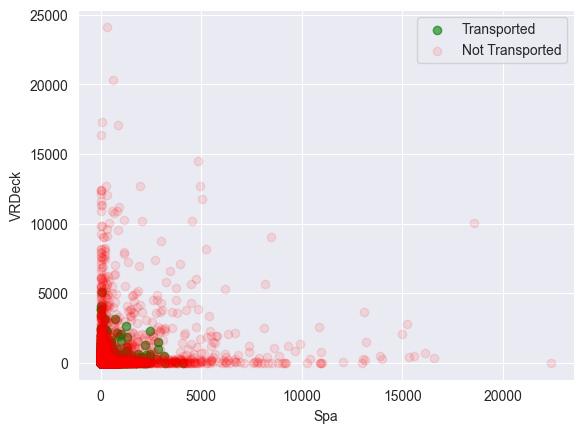

In [570]:
plt.scatter(test[test['Transported'] == 1]['Spa'],
            test[test['Transported'] == 1]['VRDeck'],
            color='green', label='Transported', alpha=0.6)

plt.scatter(test[test['Transported'] == 0]['Spa'],
            test[test['Transported'] == 0]['VRDeck'],
            color='red', label='Not Transported', alpha=0.1)

plt.xlabel('Spa')
plt.ylabel('VRDeck')
plt.legend()
plt.show()

In [571]:
new_set

,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep,Transported,duplicated_name,...,deck_D,deck_E,deck_F,deck_G,deck_T,deck_Unknown,side_S,side_Unknown,home_planet_Europa,home_planet_Mars
0,39,0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,24,0,109.0,9.0,25.0,549.0,44.0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
2,58,1,43.0,3576.0,0.0,6715.0,49.0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,33,0,0.0,1283.0,371.0,3329.0,193.0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,16,0,303.0,70.0,151.0,565.0,2.0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41,1,0.0,6819.0,0.0,1643.0,74.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8689,18,0,0.0,0.0,0.0,0.0,0.0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
8690,26,0,0.0,0.0,1872.0,1.0,0.0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
8691,32,0,0.0,1049.0,0.0,353.0,3235.0,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [572]:
new_set['log1_total_spent'] = np.log1p(new_set['total_spent'])
new_set['is_spender'] = new_set['total_spent'] > 0
new_set

,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep,Transported,duplicated_name,...,deck_F,deck_G,deck_T,deck_Unknown,side_S,side_Unknown,home_planet_Europa,home_planet_Mars,log1_total_spent,is_spender
0,39,0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0.000000,False
1,24,0,109.0,9.0,25.0,549.0,44.0,0,1,0,...,1,0,0,0,1,0,0,0,6.602588,True
2,58,1,43.0,3576.0,0.0,6715.0,49.0,0,0,0,...,0,0,0,0,1,0,1,0,9.248021,True
3,33,0,0.0,1283.0,371.0,3329.0,193.0,0,0,0,...,0,0,0,0,1,0,1,0,8.551981,True
4,16,0,303.0,70.0,151.0,565.0,2.0,0,1,0,...,1,0,0,0,1,0,0,0,6.995766,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41,1,0.0,6819.0,0.0,1643.0,74.0,0,0,0,...,0,0,0,0,0,0,1,0,9.052165,True
8689,18,0,0.0,0.0,0.0,0.0,0.0,1,0,0,...,0,1,0,0,1,0,0,0,0.000000,False
8690,26,0,0.0,0.0,1872.0,1.0,0.0,0,1,0,...,0,1,0,0,1,0,0,0,7.535830,True
8691,32,0,0.0,1049.0,0.0,353.0,3235.0,0,0,0,...,0,0,0,0,1,0,1,0,8.442039,True


In [573]:
from sklearn.ensemble import HistGradientBoostingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import MinMaxScaler, Normalizer
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier

train_set = new_set.drop(columns='Transported')
target = new_set['Transported']


X_train, X_test, y_train, y_test = train_test_split(train_set, target, test_size=0.2, random_state=42, stratify=target)

# scaler = Normalizer()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
# 
# X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
# X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

model = CatBoostClassifier(
    iterations=1700,
    learning_rate=0.017,
    depth=6,
    random_state=42,
    auto_class_weights='Balanced',
    l2_leaf_reg=3,
    bagging_temperature=1,
    border_count=254,
    loss_function='Logloss',
    eval_metric='AUC',
)

model.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=cols,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.8411278	best: 0.8411278 (0)	total: 2.63ms	remaining: 4.47s
1:	test: 0.8600540	best: 0.8600540 (1)	total: 5.16ms	remaining: 4.38s
2:	test: 0.8592134	best: 0.8600540 (1)	total: 7.73ms	remaining: 4.37s
3:	test: 0.8600222	best: 0.8600540 (1)	total: 10.4ms	remaining: 4.41s
4:	test: 0.8606373	best: 0.8606373 (4)	total: 12.9ms	remaining: 4.37s
5:	test: 0.8613959	best: 0.8613959 (5)	total: 15.3ms	remaining: 4.33s
6:	test: 0.8636195	best: 0.8636195 (6)	total: 17.8ms	remaining: 4.3s
7:	test: 0.8645270	best: 0.8645270 (7)	total: 20.3ms	remaining: 4.3s
8:	test: 0.8646215	best: 0.8646215 (8)	total: 23.1ms	remaining: 4.34s
9:	test: 0.8647293	best: 0.8647293 (9)	total: 25.8ms	remaining: 4.35s
10:	test: 0.8663153	best: 0.8663153 (10)	total: 28ms	remaining: 4.3s
11:	test: 0.8659959	best: 0.8663153 (10)	total: 30.6ms	remaining: 4.3s
12:	test: 0.8657141	best: 0.8663153 (10)	total: 33.5ms	remaining: 4.34s
13:	test: 0.8662227	best: 0.8663153 (10)	total: 36.1ms	remaining: 4.34s
14:	test: 0.868482

In [574]:
model.score(X_test, y_test)

np.float64(0.824036802760207)

In [575]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       863
           1       0.82      0.84      0.83       876

    accuracy                           0.82      1739
   macro avg       0.82      0.82      0.82      1739
weighted avg       0.82      0.82      0.82      1739



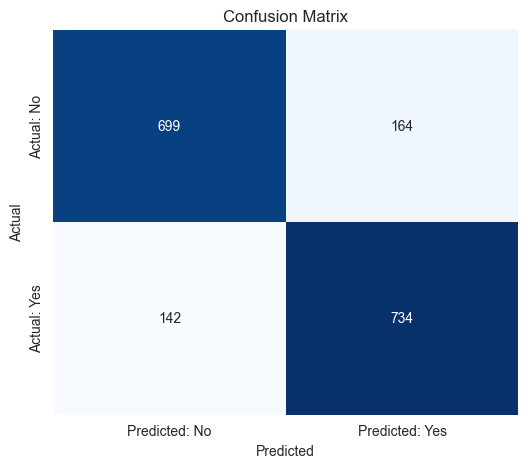

In [576]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted: No', 'Predicted: Yes'],
            yticklabels=['Actual: No', 'Actual: Yes'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

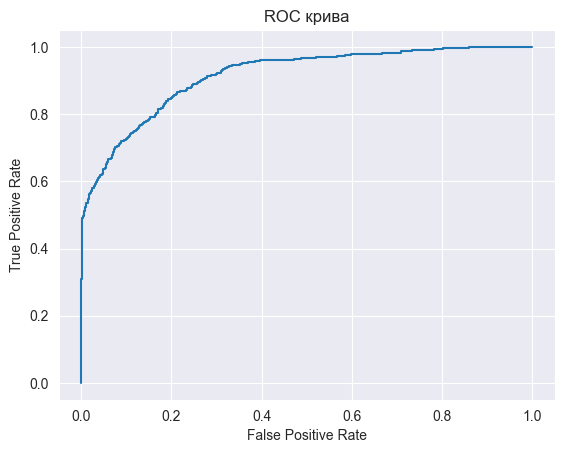

In [577]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC крива')
plt.show()

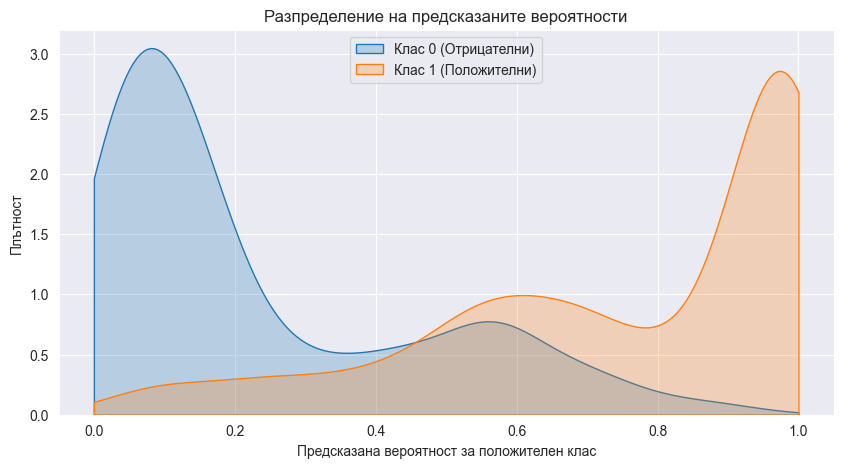

In [578]:
plt.figure(figsize=(10,5))
sns.kdeplot(y_pred_proba[y_test == 0], label='Клас 0 (Отрицателни)', fill=True, clip=(0,1))
sns.kdeplot(y_pred_proba[y_test == 1], label='Клас 1 (Положителни)', fill=True, clip=(0,1))
plt.title('Разпределение на предсказаните вероятности')
plt.xlabel('Предсказана вероятност за положителен клас')
plt.ylabel('Плътност')
plt.legend()
plt.show()

### TEST SET

In [579]:
train_set = pd.read_csv('../dataset/test.csv')
train_set

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [580]:
train_set['CryoSleep'] = train_set['CryoSleep'].fillna(0).astype(int)
train_set['duplicated_name'] = train_set['Name'].duplicated(keep=False).astype(int)

train_set

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,duplicated_name
0,0013_01,Earth,1,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0
1,0018_01,Earth,0,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0
2,0019_01,Europa,1,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0
3,0021_01,Europa,0,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0
4,0023_01,Earth,0,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,1,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,0
4273,9269_01,Earth,0,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,0
4274,9271_01,Mars,1,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,0
4275,9273_01,Europa,0,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,0


In [581]:
train_set['VIP'] = train_set['VIP'].fillna(0).astype(int)

train_set['RoomService'] = train_set['RoomService'].fillna(train_set['RoomService'].mean())
train_set['FoodCourt'] = train_set['FoodCourt'].fillna(train_set['FoodCourt'].mean())
train_set['ShoppingMall'] = train_set['ShoppingMall'].fillna(train_set['ShoppingMall'].mean())
train_set['Spa'] = train_set['Spa'].fillna(train_set['Spa'].mean())
train_set['VRDeck'] = train_set['VRDeck'].fillna(train_set['VRDeck'].mean())
train_set['Age'] = train_set['Age'].fillna(train_set['Age'].mean())

train_set['LastName'] = train_set['Name'].str.split(' ').str[-1]
train_set['has_duplicate_lastname'] = train_set['LastName'].duplicated(keep=False).astype(int)
train_set = train_set.drop(columns='LastName')

train_set['PassengerGroup'] = train_set['PassengerId'].str.split('_').str[0].astype(int)
train_set['more_than_one_in_group'] = train_set['PassengerGroup'].duplicated(keep=False).astype(int)
train_set = train_set.drop(columns='PassengerGroup')



new_set = train_set[['Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 
                     'VRDeck', 'CryoSleep', 'duplicated_name', 'has_duplicate_lastname', 
                     'more_than_one_in_group', 'Cabin', 'HomePlanet']].copy()

new_set.loc[:, 'total_spent'] = (
    new_set['RoomService'] +
    new_set['FoodCourt'] +
    new_set['ShoppingMall'] +
    new_set['Spa'] +
    new_set['VRDeck']
)

new_set.loc[:, 'room_service_plus_food_court'] = (
    new_set['RoomService'] + new_set['FoodCourt']
)

new_set.loc[:, 'room_service_plus_shopping_mall'] = (
    new_set['RoomService'] + new_set['ShoppingMall']
)

new_set.loc[:, 'room_service_plus_spa'] = (
    new_set['RoomService'] + new_set['Spa']
)

new_set.loc[:, 'food_court_plus_shopping_mall'] = (
    new_set['FoodCourt'] + new_set['ShoppingMall']
)

new_set.loc[:, 'food_court_plus_spa'] = (
    new_set['FoodCourt'] + new_set['Spa']
)

new_set['planet_avg_spent'] = new_set.groupby('HomePlanet')['total_spent'].transform('mean')
new_set['planet_spent_ratio'] = new_set['total_spent'] / (new_set['planet_avg_spent'] + 1)

In [582]:
new_set[['deck', 'num', 'side']] = new_set['Cabin'].str.split('/', expand=True)

new_set['num'] = pd.to_numeric(new_set['num'], errors='coerce')

new_set['deck'] = new_set['deck'].fillna('Unknown')
new_set['side'] = new_set['side'].fillna('Unknown')
new_set['num'] = new_set['num'].fillna(0)

deck_dummies = (pd.get_dummies(new_set['deck'], prefix='deck', drop_first=True)).astype(int)
new_set = pd.concat([new_set, deck_dummies], axis=1)

deck_dummies = (pd.get_dummies(new_set['side'], prefix='side', drop_first=True)).astype(int)
new_set = pd.concat([new_set, deck_dummies], axis=1)

new_set = new_set.drop(['deck', 'side', 'Cabin'], axis=1)

home_planet_dummies = pd.get_dummies(new_set['HomePlanet'], prefix='home_planet', drop_first=True).astype(int)
new_set = pd.concat([new_set, home_planet_dummies], axis=1)
new_set = new_set.drop(columns='HomePlanet')

In [583]:
new_set['log1_total_spent'] = np.log1p(new_set['total_spent'])
new_set['is_spender'] = new_set['total_spent'] > 0

In [584]:
passenger_id = train_set['PassengerId']

In [585]:
y_pred = model.predict(new_set)
y_pred

array([1, 0, 1, ..., 1, 1, 1], shape=(4277,))

In [586]:
submission = pd.DataFrame({
    'PassengerId': passenger_id,
    'Transported': y_pred.astype(bool)
})

submission.to_csv('submission.csv', index=False)
print("✅ Submission файлът е готов: submission.csv")

✅ Submission файлът е готов: submission.csv
